In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('data/games0108.csv', sep=',')

In [86]:
df = df.drop('fortlfd', axis=1)

In [87]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,-3.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,-7.0,0.00,3.000000,0.0,0.0,0.0,3.0,0.0,3.0
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,3.0,5.00,-3.000000,0.0,5.0,-3.0,0.0,3.0,0.0
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,-2.0,0.00,4.333333,0.0,0.0,3.0,5.0,0.0,3.0
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,0.0,3.75,0.000000,3.0,4.0,0.0,0.0,3.0,0.0


In [88]:
df['result'] = np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))

In [89]:
from keras.utils import to_categorical

In [90]:
y_cat = (pd.get_dummies(df.result))
y_reg = df.resultNumeric

In [91]:
df_contest = pd.get_dummies(df.contest)
df = pd.concat([df, df_contest], axis=1)
df = df.drop('contest', axis=1)

In [92]:
df_day = pd.get_dummies(df.day)
df = pd.concat([df, df_day], axis=1)
df = df.drop('day', axis=1)

In [93]:
df_time = pd.get_dummies(df.time)
df = pd.concat([df, df_time], axis=1)
df = df.drop('time', axis=1)

In [94]:
df_hoamTeam = pd.get_dummies(df.hoamTeam)
df = pd.concat([df, df_hoamTeam], axis=1)
df = df.drop('hoamTeam', axis=1)

In [95]:
df_guestTeam = pd.get_dummies(df.guestTeam)
df = pd.concat([df, df_guestTeam], axis=1)
df = df.drop('guestTeam', axis=1)

In [96]:
df.shape

(522, 192)

In [97]:
df

,year,month,break,resultNumeric,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,...,SV Ried,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,Wolfsberger AC,ZSKA Sofia
0,2017,7,45,-3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,2017,7,4,-7.0,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0
2,2017,7,4,3.0,5.000000,-3.000000,0.000000,5.000000,-3.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,2017,7,3,-2.0,0.000000,4.333333,0.000000,0.000000,3.000000,5.000000,...,0,0,0,0,0,0,0,0,0,0
4,2017,7,4,0.0,3.750000,0.000000,3.000000,4.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,2017,7,3,0.0,3.000000,0.000000,1.500000,4.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
6,2017,8,4,0.0,1.000000,2.500000,0.000000,0.000000,1.000000,4.000000,...,0,0,0,0,0,0,0,0,0,0
7,2017,8,3,4.0,2.142857,0.000000,1.000000,3.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2017,8,7,-1.0,0.000000,2.375000,0.000000,0.000000,1.750000,3.000000,...,0,0,0,0,0,0,0,0,0,0
9,2017,8,5,-2.0,0.000000,2.222222,0.000000,0.000000,1.750000,2.600000,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Columns: 192 entries, year to ZSKA Sofia
dtypes: float64(9), int64(3), object(1), uint8(179)
memory usage: 144.3+ KB


In [99]:
df.corr()['resultNumeric'].sort_values()

Red Bull Salzburg              -0.219718
guestTotalGoalDiff             -0.215955
guestTeamGoalsDiffAway         -0.211635
ÖFB-Cup  ÖFB-Cup               -0.193710
guestTeamGoalsDiffAtHome       -0.172638
ATSV Stadl-Paura               -0.166928
guestAvgpoints                 -0.157949
FC Pinzgau Saalfelden          -0.149127
Deutschlandsberger SC          -0.146401
ASKÖ Oedt                      -0.134598
SK Maria Saal                  -0.125874
SKN St. Pölten                 -0.120676
11:00                          -0.120070
SC Schwaz                      -0.120070
FC Kufstein                    -0.105347
LASK                           -0.104116
19:00                          -0.099951
Fr                             -0.090328
AC Mailand                     -0.084821
FC Dornbirn                    -0.084821
ASK Elektra                    -0.084821
FV Austria XIII                -0.084821
break                          -0.082948
Mi                             -0.077717
Grazer AK 1902  

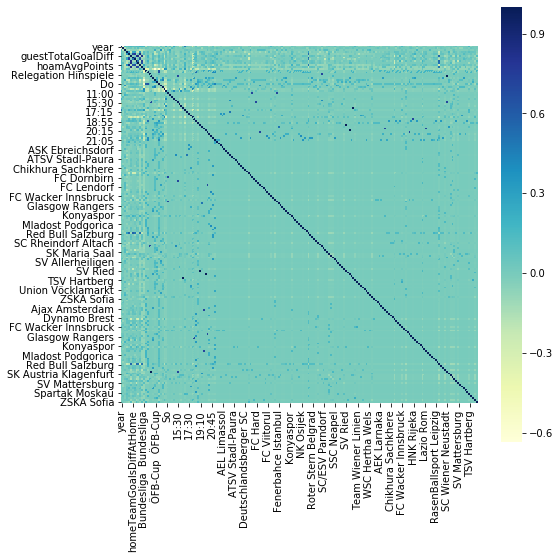

In [100]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")
plt.show()

In [101]:
X = df.drop(['resultNumeric', 'result'], axis=1)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=3)

In [107]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(190, 3)

In [108]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


In [109]:
model_1.compile(optimizer='adam', loss='mse')

In [110]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 1s 2ms/step - loss: 5.0689 - val_loss: 4.8919
Epoch 2/100
417/417 [==============================] - 0s 138us/step - loss: 4.6023 - val_loss: 4.7072
Epoch 3/100
417/417 [==============================] - 0s 115us/step - loss: 4.2642 - val_loss: 4.5819
Epoch 4/100
417/417 [==============================] - 0s 115us/step - loss: 3.9968 - val_loss: 4.5053
Epoch 5/100
417/417 [==============================] - 0s 105us/step - loss: 3.7764 - val_loss: 4.4332
Epoch 6/100
417/417 [==============================] - 0s 106us/step - loss: 3.5634 - val_loss: 4.3773
Epoch 7/100
417/417 [==============================] - 0s 96us/step - loss: 3.3767 - val_loss: 4.3395
Epoch 8/100
417/417 [==============================] - 0s 115us/step - loss: 3.2221 - val_loss: 4.2739
Epoch 9/100
417/417 [==============================] - 0s 182us/step - loss: 3.0427 - val_loss: 4.2146
Epoch 10/100
417/417 [========

417/417 [==============================] - 0s 144us/step - loss: 1.0670 - val_loss: 4.3763
Epoch 80/100
417/417 [==============================] - 0s 163us/step - loss: 1.0162 - val_loss: 4.4280
Epoch 81/100
417/417 [==============================] - 0s 182us/step - loss: 0.9903 - val_loss: 4.3923
Epoch 82/100
417/417 [==============================] - 0s 182us/step - loss: 0.9700 - val_loss: 4.4083
Epoch 83/100
417/417 [==============================] - 0s 134us/step - loss: 0.9568 - val_loss: 4.4683
Epoch 84/100
417/417 [==============================] - 0s 211us/step - loss: 0.9452 - val_loss: 4.4526
Epoch 85/100
417/417 [==============================] - 0s 144us/step - loss: 0.9318 - val_loss: 4.4762
Epoch 86/100
417/417 [==============================] - 0s 201us/step - loss: 0.9172 - val_loss: 4.4886
Epoch 87/100
417/417 [==============================] - 0s 163us/step - loss: 0.9131 - val_loss: 4.5104
Epoch 88/100
417/417 [==============================] - 0s 125us/step - loss:

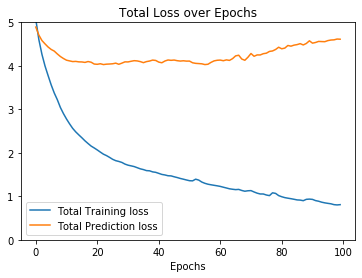

In [111]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [116]:
rfr = RandomForestRegressor(n_estimators=1000)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8875209518175889

In [117]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

13.523247420171836

In [119]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [120]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [121]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [122]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 1528      
_________________________________________________________________
batch_normalization_4 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [123]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 4s 11ms/step - loss: 5.6814 - Regression_loss: 4.5874 - Classification_loss: 1.0940 - Regression_acc: 0.2158 - Classification_acc: 0.4173 - val_loss: 39241.4686 - val_Regression_loss: 39239.2345 - val_Classification_loss: 2.2341 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3333
Epoch 2/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6670 - Regression_loss: 4.5813 - Classification_loss: 1.0857 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 40050.1628 - val_Regression_loss: 40047.7589 - val_Classification_loss: 2.4038 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3333
Epoch 3/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6567 - Regression_loss: 4.5776 - Classification_loss: 1.0790 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 37050.3074 - val_Regression_loss: 37046.2798 - val_Cla

In [124]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [125]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [126]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [127]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 190)               36290     
_________________________________________________________________
batch_normalization_6 (Batch (None, 190)               760       
_________________________________________________________________
hidden_2 (Dense)             (None, 190)               36290     
_________________________________________________________________
Regression (Dense)           (None, 1)                 191       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 73,537
Trainable params: 73,157
Non-trainable params: 380
_________________________________________________________________


In [128]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 5s 12ms/step - loss: 5.6802 - Regression_loss: 4.5879 - Classification_loss: 1.0923 - Regression_acc: 0.2158 - Classification_acc: 0.3837 - val_loss: 82.5981 - val_Regression_loss: 79.4748 - val_Classification_loss: 3.1232 - val_Regression_acc: 0.0571 - val_Classification_acc: 0.2762
Epoch 2/100
417/417 [==============================] - 3s 6ms/step - loss: 5.6632 - Regression_loss: 4.5811 - Classification_loss: 1.0822 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 89.1892 - val_Regression_loss: 85.6404 - val_Classification_loss: 3.5488 - val_Regression_acc: 0.0667 - val_Classification_acc: 0.2667
Epoch 3/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6515 - Regression_loss: 4.5747 - Classification_loss: 1.0767 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 89.2012 - val_Regression_loss: 85.5047 - val_Classification_loss: 3.696

Epoch 25/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6333 - Regression_loss: 4.5697 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 91.5305 - val_Regression_loss: 87.2772 - val_Classification_loss: 4.2533 - val_Regression_acc: 0.0381 - val_Classification_acc: 0.2476
Epoch 26/100
417/417 [==============================] - 3s 6ms/step - loss: 5.6341 - Regression_loss: 4.5703 - Classification_loss: 1.0638 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 90.7296 - val_Regression_loss: 86.6655 - val_Classification_loss: 4.0641 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.2667
Epoch 27/100
417/417 [==============================] - 3s 6ms/step - loss: 5.6344 - Regression_loss: 4.5710 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 91.9292 - val_Regression_loss: 87.8649 - val_Classification_loss: 4.0644 - val_Regression_acc: 0.0286 - val_Classif

Epoch 49/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6333 - Regression_loss: 4.5696 - Classification_loss: 1.0638 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 91.9044 - val_Regression_loss: 87.7470 - val_Classification_loss: 4.1574 - val_Regression_acc: 0.0571 - val_Classification_acc: 0.2667
Epoch 50/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6330 - Regression_loss: 4.5694 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 85.6171 - val_Regression_loss: 81.6563 - val_Classification_loss: 3.9607 - val_Regression_acc: 0.0667 - val_Classification_acc: 0.2667
Epoch 51/100
417/417 [==============================] - 3s 6ms/step - loss: 5.6338 - Regression_loss: 4.5702 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 93.3675 - val_Regression_loss: 89.1445 - val_Classification_loss: 4.2230 - val_Regression_acc: 0.0667 - val_Classif

417/417 [==============================] - 3s 8ms/step - loss: 5.6338 - Regression_loss: 4.5700 - Classification_loss: 1.0638 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 95.9848 - val_Regression_loss: 91.7145 - val_Classification_loss: 4.2702 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.2571
Epoch 74/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6329 - Regression_loss: 4.5694 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 81.5840 - val_Regression_loss: 77.6732 - val_Classification_loss: 3.9108 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.2762
Epoch 75/100
417/417 [==============================] - 3s 8ms/step - loss: 5.6329 - Regression_loss: 4.5693 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 94.4826 - val_Regression_loss: 90.1870 - val_Classification_loss: 4.2956 - val_Regression_acc: 0.0190 - val_Classification_acc: 

417/417 [==============================] - 3s 7ms/step - loss: 5.6330 - Regression_loss: 4.5696 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 95.6107 - val_Regression_loss: 91.3423 - val_Classification_loss: 4.2684 - val_Regression_acc: 0.0190 - val_Classification_acc: 0.2381
Epoch 98/100
417/417 [==============================] - 3s 7ms/step - loss: 5.6325 - Regression_loss: 4.5691 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 89.3155 - val_Regression_loss: 85.1721 - val_Classification_loss: 4.1434 - val_Regression_acc: 0.0762 - val_Classification_acc: 0.2571
Epoch 99/100
417/417 [==============================] - 3s 8ms/step - loss: 5.6338 - Regression_loss: 4.5702 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 88.7450 - val_Regression_loss: 84.6844 - val_Classification_loss: 4.0606 - val_Regression_acc: 0.0667 - val_Classification_acc: 

In [129]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(-15.079943,
 array([1.0000000e+00, 4.0858984e-05, 1.0430813e-06], dtype=float32))

In [130]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
output_tensor_reg = Dense(1, name='Regression')(hidden_1)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [131]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [132]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [133]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 380)               72580     
_________________________________________________________________
Regression (Dense)           (None, 1)                 381       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 72,967
Trainable params: 72,967
Non-trainable params: 0
_________________________________________________________________


In [134]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 5s 12ms/step - loss: 5.9335 - Regression_loss: 4.8482 - Classification_loss: 1.0853 - Regression_acc: 0.1966 - Classification_acc: 0.3909 - val_loss: 6.6435 - val_Regression_loss: 5.5440 - val_Classification_loss: 1.0996 - val_Regression_acc: 0.1810 - val_Classification_acc: 0.4095
Epoch 2/50
417/417 [==============================] - 3s 7ms/step - loss: 4.4915 - Regression_loss: 3.5465 - Classification_loss: 0.9449 - Regression_acc: 0.2062 - Classification_acc: 0.5060 - val_loss: 4.7410 - val_Regression_loss: 3.7133 - val_Classification_loss: 1.0277 - val_Regression_acc: 0.2286 - val_Classification_acc: 0.5143
Epoch 3/50
417/417 [==============================] - 3s 7ms/step - loss: 3.3805 - Regression_loss: 2.4571 - Classification_loss: 0.9234 - Regression_acc: 0.2542 - Classification_acc: 0.6283 - val_loss: 5.5104 - val_Regression_loss: 4.4441 - val_Classification_loss: 1.0663 - val_R

417/417 [==============================] - 3s 6ms/step - loss: 1.4023 - Regression_loss: 0.8416 - Classification_loss: 0.5606 - Regression_acc: 0.4844 - Classification_acc: 0.7650 - val_loss: 5.8825 - val_Regression_loss: 4.4554 - val_Classification_loss: 1.4271 - val_Regression_acc: 0.2095 - val_Classification_acc: 0.5048
Epoch 26/50
417/417 [==============================] - 3s 7ms/step - loss: 1.2843 - Regression_loss: 0.7157 - Classification_loss: 0.5685 - Regression_acc: 0.5012 - Classification_acc: 0.7650 - val_loss: 6.1808 - val_Regression_loss: 4.6422 - val_Classification_loss: 1.5386 - val_Regression_acc: 0.1810 - val_Classification_acc: 0.4857
Epoch 27/50
417/417 [==============================] - 3s 8ms/step - loss: 1.4533 - Regression_loss: 0.8887 - Classification_loss: 0.5646 - Regression_acc: 0.4628 - Classification_acc: 0.7602 - val_loss: 5.6220 - val_Regression_loss: 4.1938 - val_Classification_loss: 1.4282 - val_Regression_acc: 0.2476 - val_Classification_acc: 0.5238
E

417/417 [==============================] - 3s 7ms/step - loss: 0.8491 - Regression_loss: 0.4766 - Classification_loss: 0.3724 - Regression_acc: 0.6739 - Classification_acc: 0.8993 - val_loss: 6.4905 - val_Regression_loss: 4.6011 - val_Classification_loss: 1.8894 - val_Regression_acc: 0.2476 - val_Classification_acc: 0.4952
Epoch 50/50
417/417 [==============================] - 3s 8ms/step - loss: 0.8051 - Regression_loss: 0.4151 - Classification_loss: 0.3900 - Regression_acc: 0.6619 - Classification_acc: 0.8705 - val_loss: 6.0671 - val_Regression_loss: 4.3446 - val_Classification_loss: 1.7225 - val_Regression_acc: 0.2667 - val_Classification_acc: 0.4952


In [135]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(-15.079943,
 array([1.0000000e+00, 4.0858984e-05, 1.0430813e-06], dtype=float32))

In [136]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(-1.2988116, array([0.17400819, 0.86008906, 0.00110584], dtype=float32))

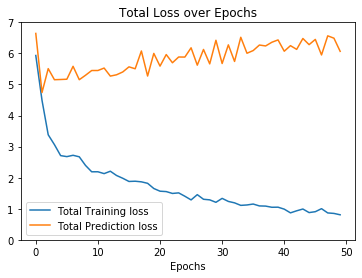

In [137]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

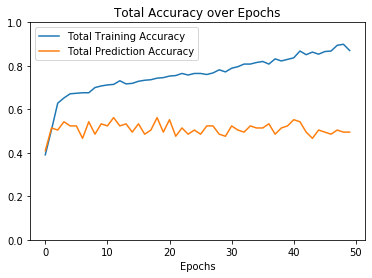

In [138]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])